# BOARD INFINITY

# PROJECT 2 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
data=pd.read_csv("C:/Users/siriv/Desktop/python project 2/Ecommerce - UK Retailer.csv", engine='python')

In [16]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
data.shape

(541909, 8)

In [18]:
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])


In [19]:

data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [20]:
data.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [21]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
data["CustomerID"].fillna(data["CustomerID"].value_counts().index[0],inplace=True)
data["Description"].fillna(data["Description"].value_counts().index[0],inplace=True)

In [23]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
data.shape

(541909, 8)

In [25]:
data["CustomerID"]=data["CustomerID"].astype(str)


## 3. Remove duplicate rows¶


In [26]:
data=data.drop_duplicates(keep=False)

In [27]:
data.shape

(531762, 8)

## 4. Remove rows which have negative values in Quantity column¶

In [28]:
data=data[data["Quantity"]>=0]

In [29]:
data.shape

(521207, 8)

## 5. Add the columns - Month, Day and Hour for the invoice

In [30]:
data["month_year"]=data["InvoiceDate"].dt.month.astype(str)+"_"+(data["InvoiceDate"].dt.year.astype(str))


In [31]:
data["month"]=data["InvoiceDate"].dt.month

In [32]:
data["day"]=data["InvoiceDate"].dt.day

In [33]:
data["hour"]=data["InvoiceDate"].dt.hour


In [34]:
data["week_day"]=(data["InvoiceDate"].dt.dayofweek+1)

In [35]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,month,day,hour,week_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12_2010,12,1,8,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12_2010,12,1,8,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12_2010,12,1,8,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12_2010,12,1,8,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12_2010,12,1,8,3


In [36]:
data.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
month_year             object
month                   int64
day                     int64
hour                    int64
week_day                int64
dtype: object

## 6. How many orders made by the customers

In [37]:
# We know that each order will get separate invoice or id so to get total orders we are counting unique invoice id's

In [38]:
tot_orders=data["InvoiceNo"].nunique()
tot_orders

20726

In [39]:

print("Total no of orders made by the customers is :",tot_orders)

Total no of orders made by the customers is : 20726


## 7. TOP 5 customers with higher number of orders

In [40]:
top5_no_ord=pd.DataFrame(data.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False).head(5))
top5_no_ord


,InvoiceNo
CustomerID,
17841.0,2315
12748.0,210
14911.0,201
13089.0,97
14606.0,93


In [41]:
# Verifiying the above result
guru=data[data["CustomerID"]=="17841.0"]

In [42]:
guru["InvoiceNo"].value_counts().count()

2315

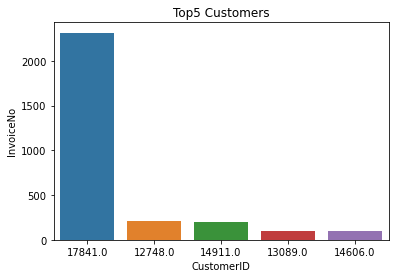

In [43]:
sns.barplot(x=top5_no_ord.index,y=top5_no_ord["InvoiceNo"])
plt.title("Top5 Customers")
plt.show()

## 8. How much money spent by the customers?¶


In [44]:

tot_rev=round(sum(data["Quantity"]*data["UnitPrice"]),2)
tot_rev

10597171.76

In [45]:
print("The total revenue generated is :{}".format(tot_rev))

The total revenue generated is :10597171.76


## 9. TOP 5 customers with highest money spent¶


In [46]:
data["Amount"]=data["Quantity"]*data["UnitPrice"]
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,month,day,hour,week_day,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12_2010,12,1,8,3,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12_2010,12,1,8,3,20.34


In [47]:
pd.DataFrame(data.groupby("CustomerID")["Amount"].sum().sort_values(ascending=False).map(int).head(5)   )


,Amount
CustomerID,
17841.0,1772508
14646.0,280206
18102.0,259657
17450.0,194230
16446.0,168472


## 10. How many orders per month?¶


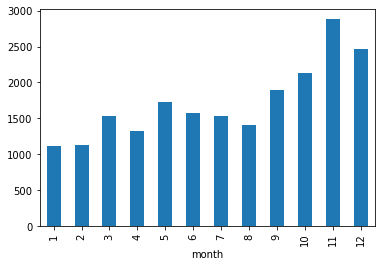

In [48]:
data.groupby("month")["InvoiceNo"].nunique().plot(kind="bar")
plt.show()

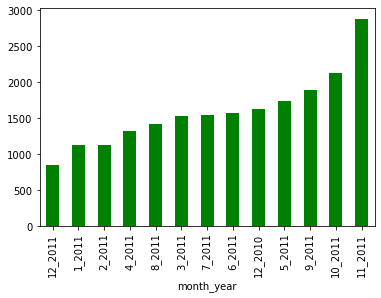

In [49]:
data.groupby("month_year")["InvoiceNo"].nunique().sort_values().plot(kind="bar",color='green')
plt.show()

## 11. How many orders per day?¶


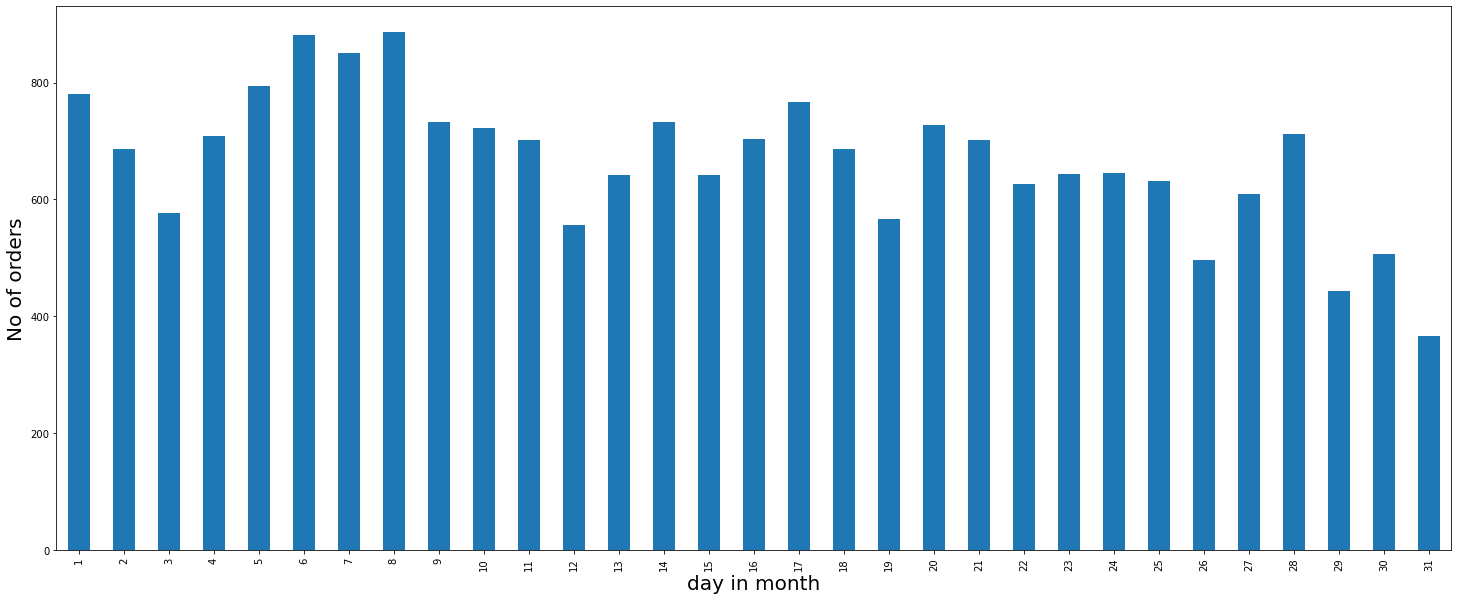

In [50]:
a=data.groupby("day")["InvoiceNo"].nunique().plot(kind="bar",figsize=(25,10))
a.set_xlabel('day in month',fontsize=20)
a.set_ylabel('No of orders',fontsize=20)
plt.show()

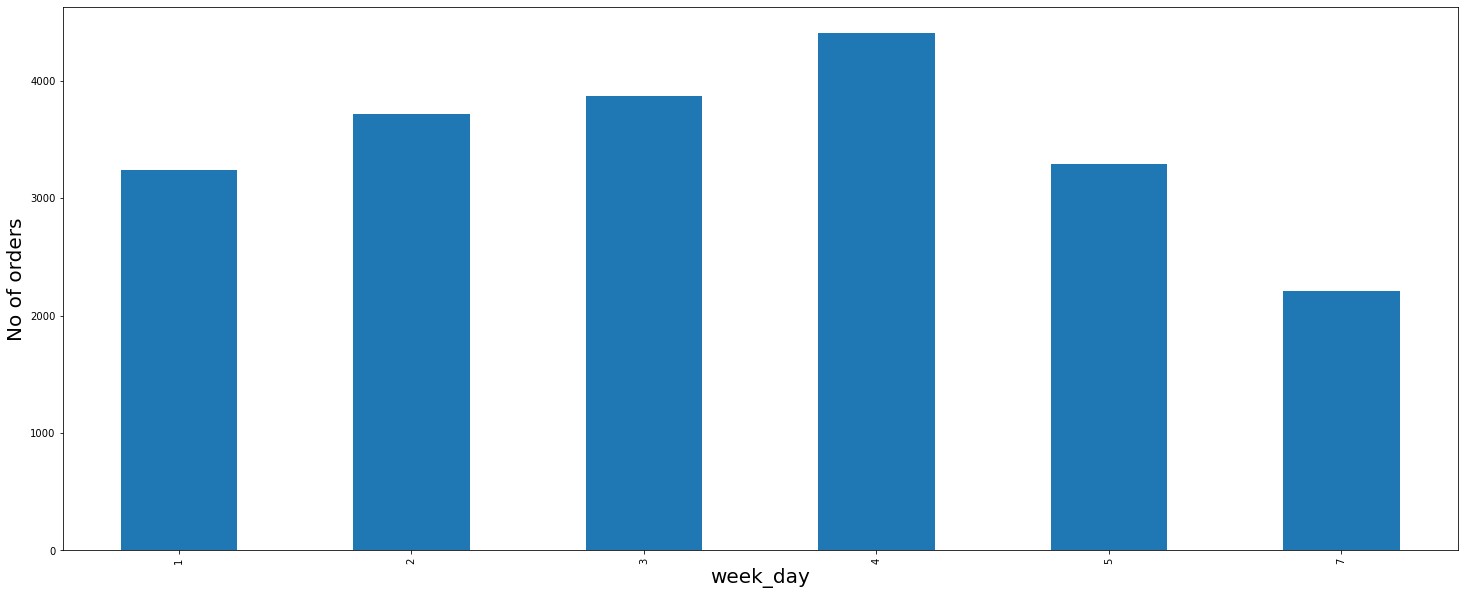

In [51]:
b=data.groupby("week_day")["InvoiceNo"].nunique().plot(kind="bar",figsize=(25,10))
b.set_xlabel('week_day',fontsize=20)
b.set_ylabel('No of orders',fontsize=20)
plt.show()

## 12. How many orders per hour?¶


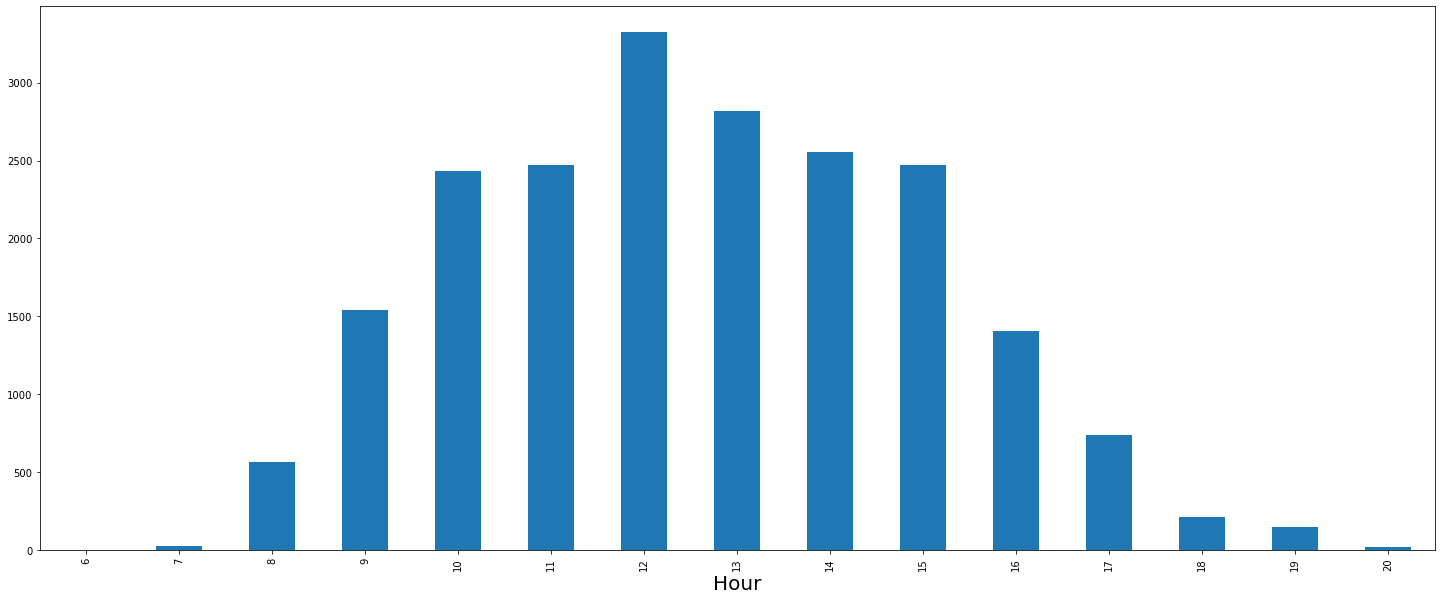

In [52]:
c=data.groupby("hour")["InvoiceNo"].nunique().plot(kind="bar",figsize=(25,10))
c.set_xlabel('Hour',fontsize=20)
plt.show()

## 13. How many orders for each country?¶


In [53]:
data.groupby("Country")["InvoiceNo"].count().sort_values(ascending=False)


Country
United Kingdom          476382
Germany                   9012
France                    8378
EIRE                      7872
Spain                     2475
Netherlands               2363
Belgium                   2031
Switzerland               1951
Portugal                  1484
Australia                 1183
Norway                    1072
Italy                      758
Channel Islands            746
Finland                    685
Cyprus                     593
Sweden                     449
Unspecified                438
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     289
Hong Kong                  276
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


## 14. Orders trend across months¶


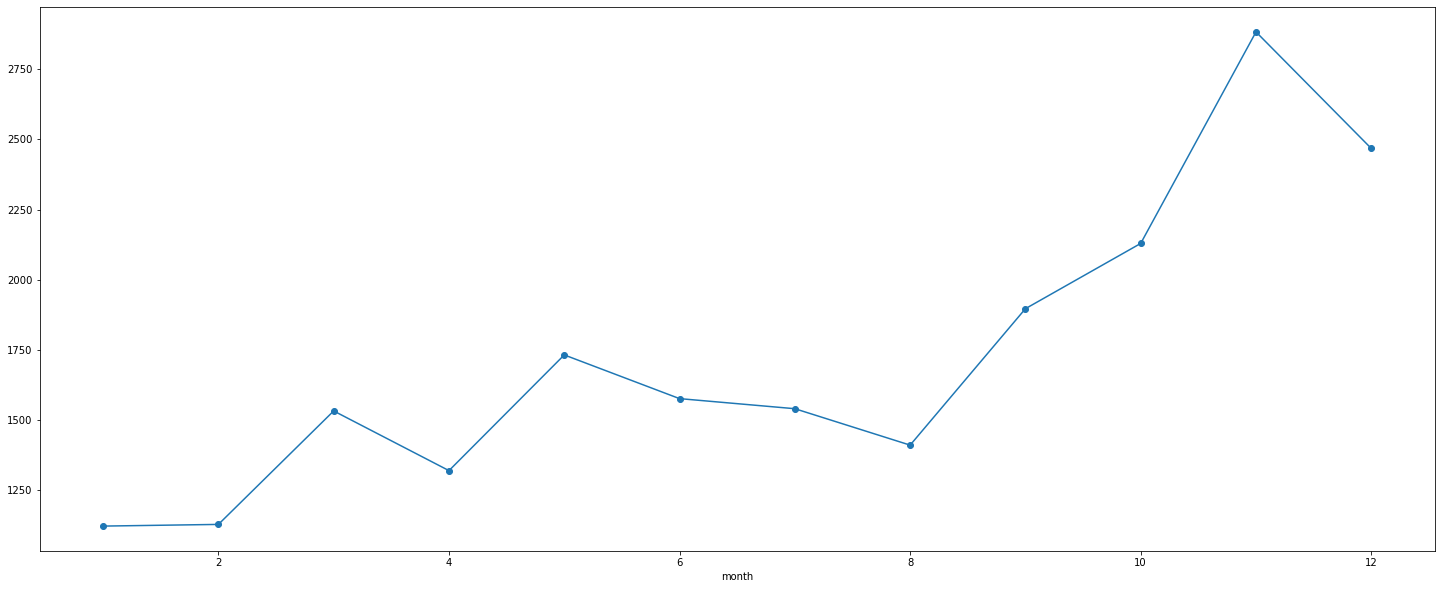

In [54]:
data.groupby("month")["InvoiceNo"].nunique().plot(kind="line",marker='o',figsize=(25,10))
plt.show()

## 15. How much money spent by each country?¶


In [55]:
data.groupby("Country")["Amount"].sum().sort_values(ascending=False).map(int)


Country
United Kingdom          8957894
Netherlands              285446
EIRE                     282827
Germany                  228489
France                   209535
Australia                138386
Spain                     61540
Switzerland               57045
Belgium                   41196
Sweden                    38357
Japan                     37416
Norway                    36165
Portugal                  33621
Finland                   22546
Singapore                 21279
Channel Islands           20430
Denmark                   18955
Italy                     17483
Hong Kong                 15274
Cyprus                    13419
Austria                   10198
Israel                     8123
Poland                     7334
Greece                     4760
Unspecified                4732
Iceland                    4309
Canada                     3666
USA                        3580
Malta                      2725
United Arab Emirates       1902
Lebanon                    1693


## 1. Perform Basic EDA¶


a. Boxplot – All Numeric Variables



In [56]:
num_col=pd.DataFrame(data.loc[:,["Quantity","UnitPrice","Amount"]])
num_col

,Quantity,UnitPrice,Amount
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
...,...,...,...
541904,12,0.85,10.20
541905,6,2.10,12.60
541906,4,4.15,16.60
541907,4,4.15,16.60


In [57]:
num_col.columns


Index(['Quantity', 'UnitPrice', 'Amount'], dtype='object')

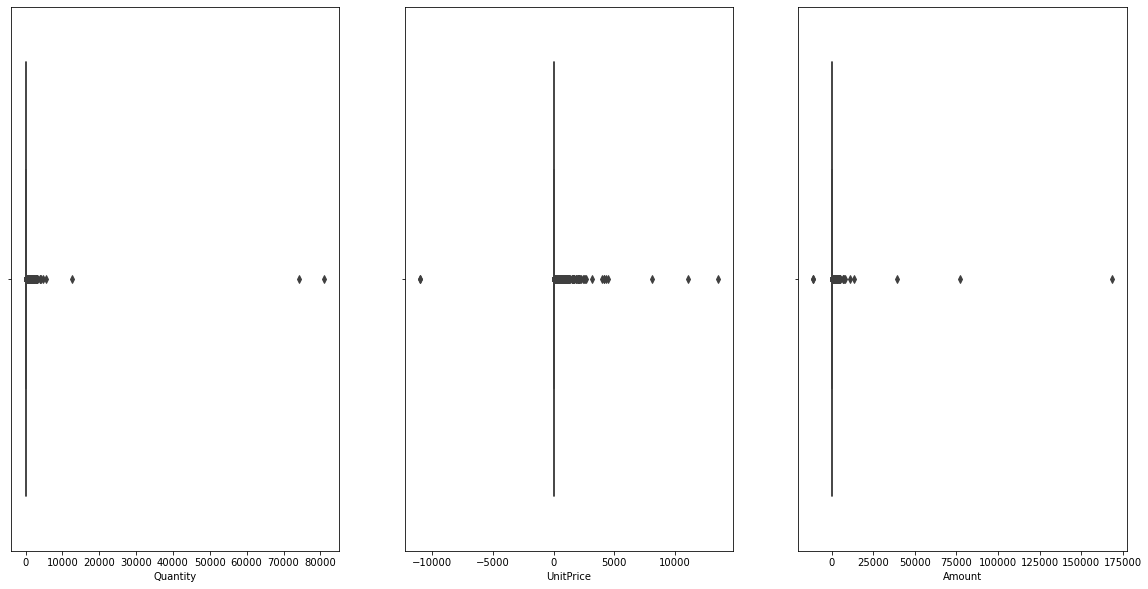

In [58]:
fig,axes= plt.subplots(ncols=3,figsize=(20,10))
sns.boxplot(num_col["Quantity"],ax=axes[0])
sns.boxplot(num_col["UnitPrice"],ax=axes[1])
sns.boxplot(num_col["Amount"],ax=axes[2])
plt.show()

b. Histogram – All Numeric Variables



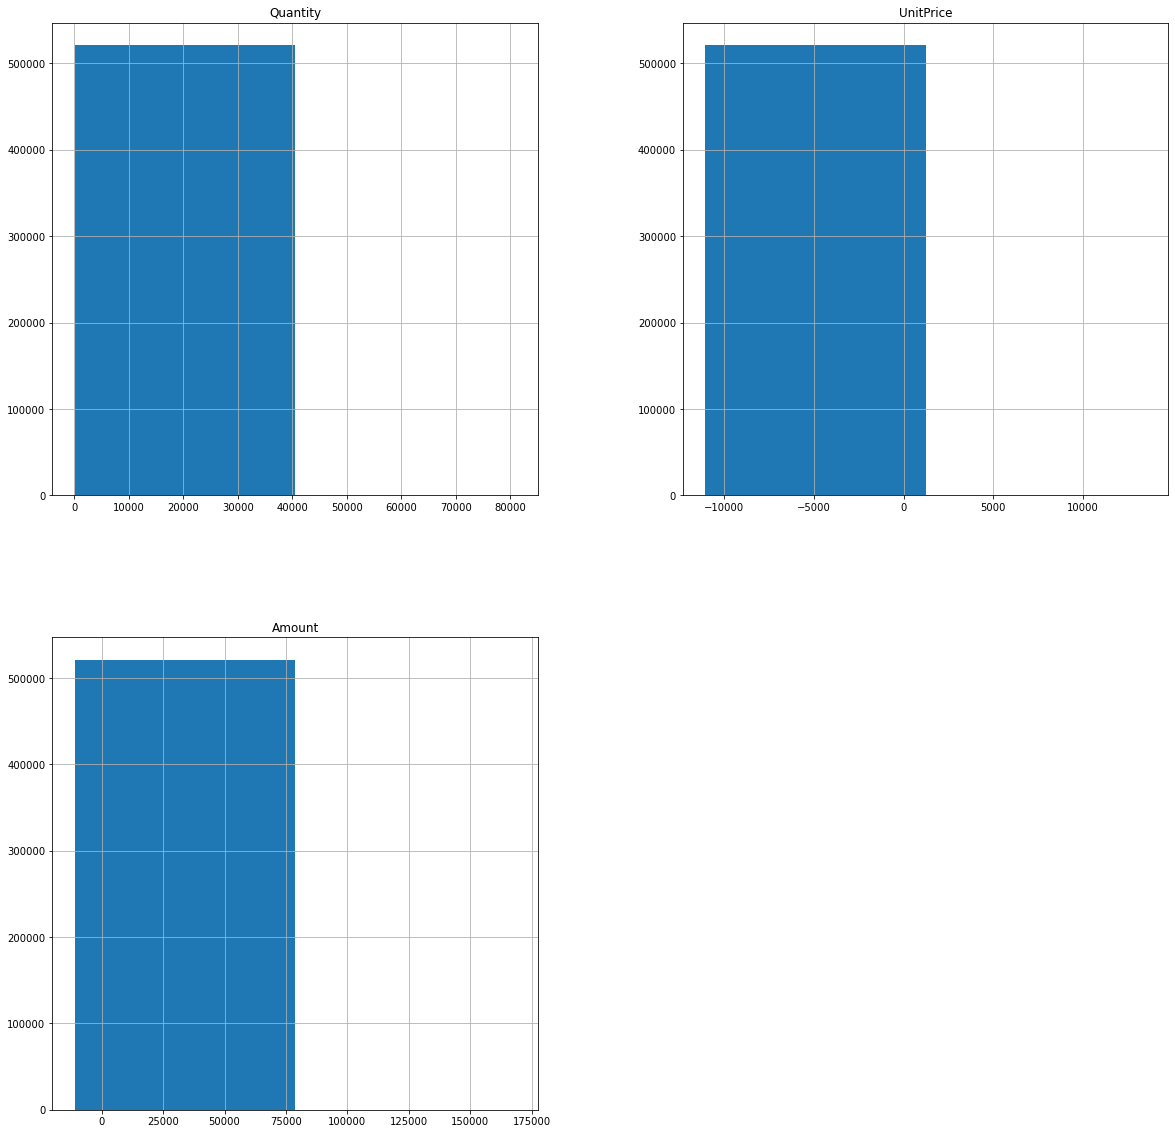

In [59]:

num_col.hist(figsize=(20,20),bins=2)
plt.show()

array([[<AxesSubplot:title={'center':'Quantity'}>]], dtype=object)

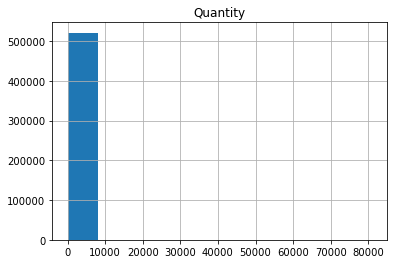

In [60]:
data.hist("Quantity")

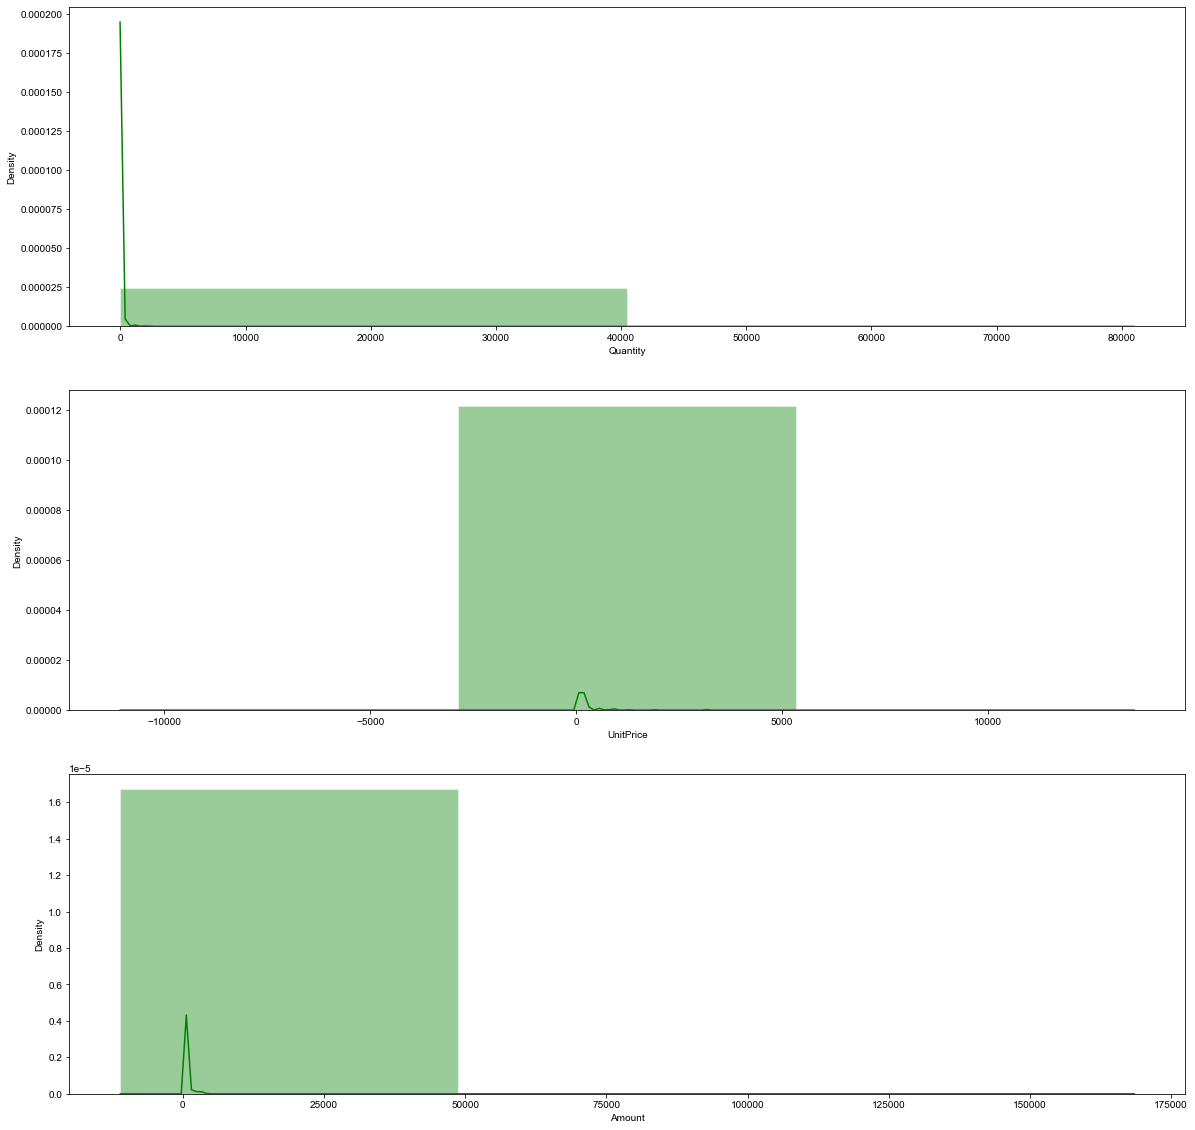

In [61]:

fig,axes=plt.subplots(nrows=3,figsize=(20,20))
sns.set_style('darkgrid')
sns.distplot(num_col['Quantity'], kde = True, color ='green', bins = 2,ax=axes[0])
sns.distplot(num_col['UnitPrice'], kde = True, color ='green', bins = 3,ax=axes[1])
sns.distplot(num_col['Amount'], kde = True, color ='green', bins = 3,ax=axes[2])
plt.show()

<AxesSubplot:xlabel='Amount', ylabel='Density'>

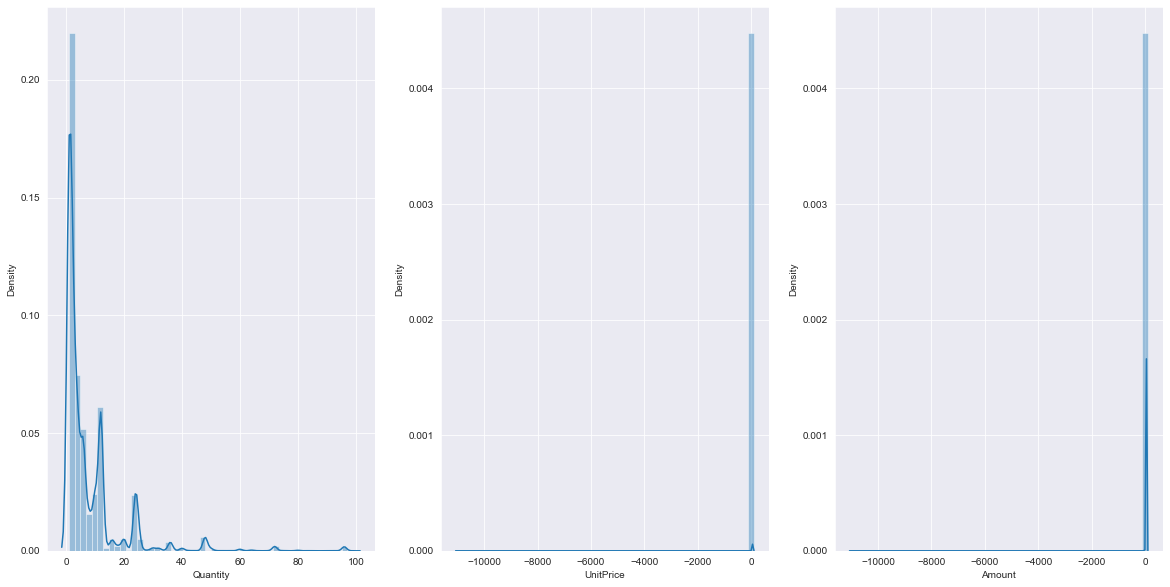

In [62]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
sns.distplot(num_col.Quantity[num_col.Quantity<100],ax=axes[0])
sns.distplot(num_col.UnitPrice[num_col.UnitPrice<100],ax=axes[1])
sns.distplot(num_col.Amount[num_col.Amount<100],ax=axes[2])

d. Aggregation for all numerical Columns



In [63]:
num_col.describe()


,Quantity,UnitPrice,Amount
count,521207.000000,521207.000000,521207.000000
mean,10.801971,3.885456,20.331983
std,158.306723,42.210671,273.507891
min,1.000000,-11062.060000,-11062.060000
25%,1.000000,1.250000,3.950000
50%,4.000000,2.080000,9.950000
75%,12.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


e. Unique Values across all columns



In [64]:
pd.unique(data[data.columns].values.ravel()).tolist()


['536365',
 '85123A',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 6,
 Timestamp('2010-12-01 08:26:00'),
 2.55,
 '17850.0',
 'United Kingdom',
 '12_2010',
 12,
 1,
 8,
 3,
 15.299999999999999,
 '71053',
 'WHITE METAL LANTERN',
 3.39,
 20.34,
 '84406B',
 'CREAM CUPID HEARTS COAT HANGER',
 2.75,
 22.0,
 '84029G',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 '84029E',
 'RED WOOLLY HOTTIE WHITE HEART.',
 '22752',
 'SET 7 BABUSHKA NESTING BOXES',
 2,
 7.65,
 15.3,
 '21730',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 4.25,
 25.5,
 '536366',
 '22633',
 'HAND WARMER UNION JACK',
 Timestamp('2010-12-01 08:28:00'),
 1.85,
 11.100000000000001,
 '22632',
 'HAND WARMER RED POLKA DOT',
 '536367',
 '84879',
 'ASSORTED COLOUR BIRD ORNAMENT',
 32,
 Timestamp('2010-12-01 08:34:00'),
 1.69,
 '13047.0',
 54.08,
 '22745',
 "POPPY'S PLAYHOUSE BEDROOM ",
 2.1,
 12.600000000000001,
 '22748',
 "POPPY'S PLAYHOUSE KITCHEN",
 '22749',
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 3.75,
 30.0,
 '22310',
 'IVORY KNITTED MUG COSY ',
 1

In [65]:
data[data.duplicated(keep='first')]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,month,day,hour,week_day,Amount


g. Correlation – Heatmap - All Numeric Variables



<AxesSubplot:>

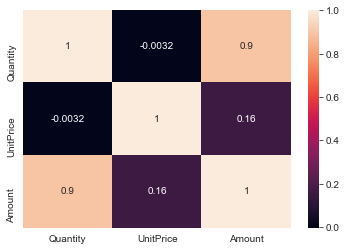

In [66]:
sns.heatmap(num_col.corr(),annot=True)

h. Regression Plot - All Numeric Variables



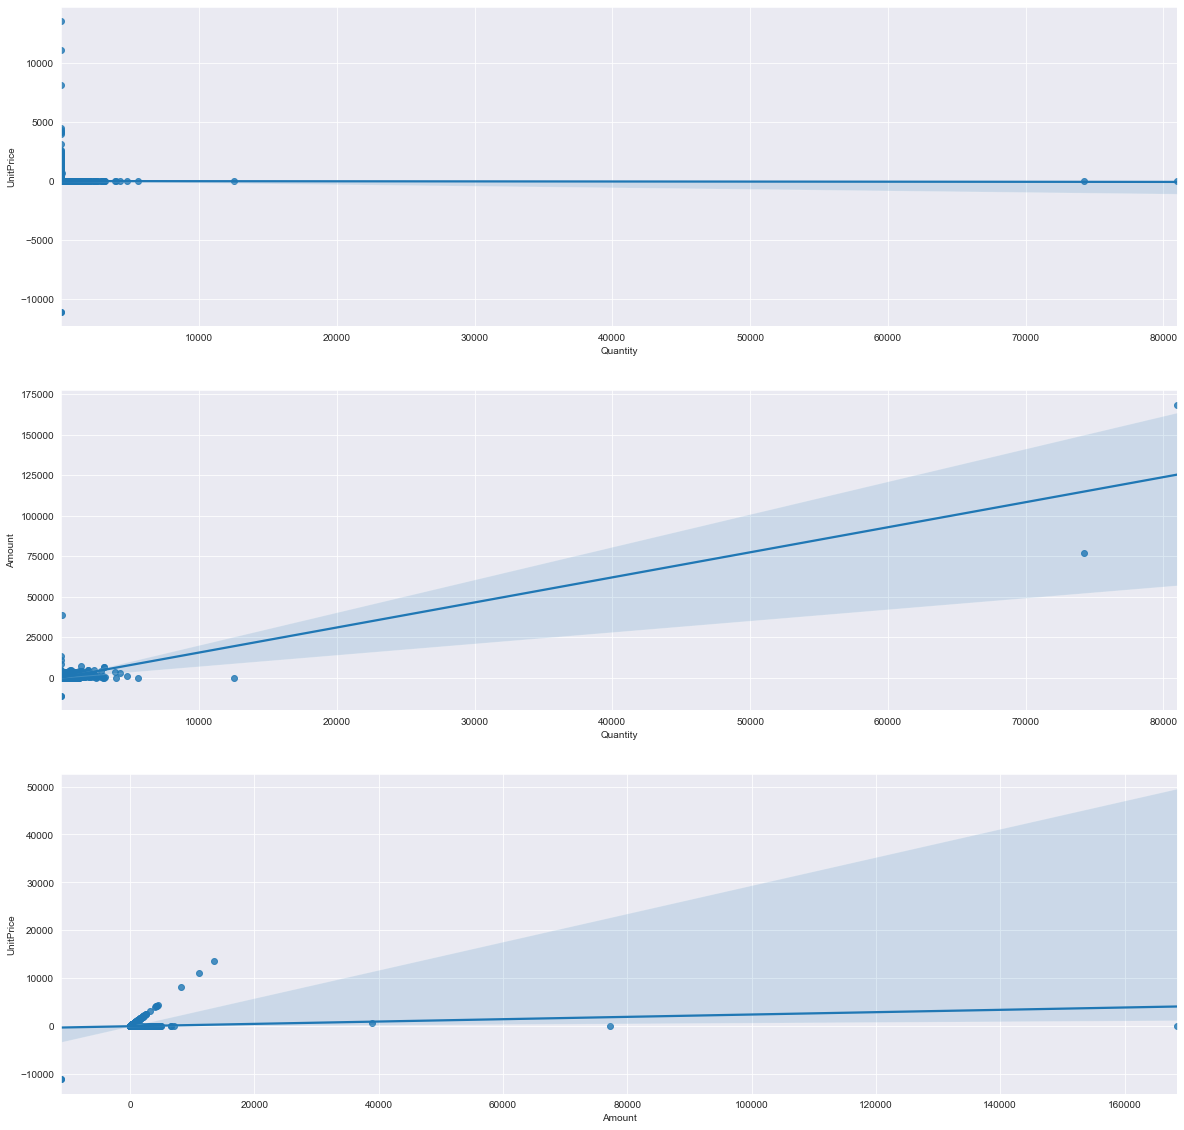

In [67]:
fig,axes=plt.subplots(nrows=3,figsize=(20,20))
sns.regplot(num_col["Quantity"],num_col["UnitPrice"],ax=axes[0])
sns.regplot(num_col["Quantity"],num_col["Amount"],ax=axes[1])
sns.regplot(num_col["Amount"],num_col["UnitPrice"],ax=axes[2])
plt.show()

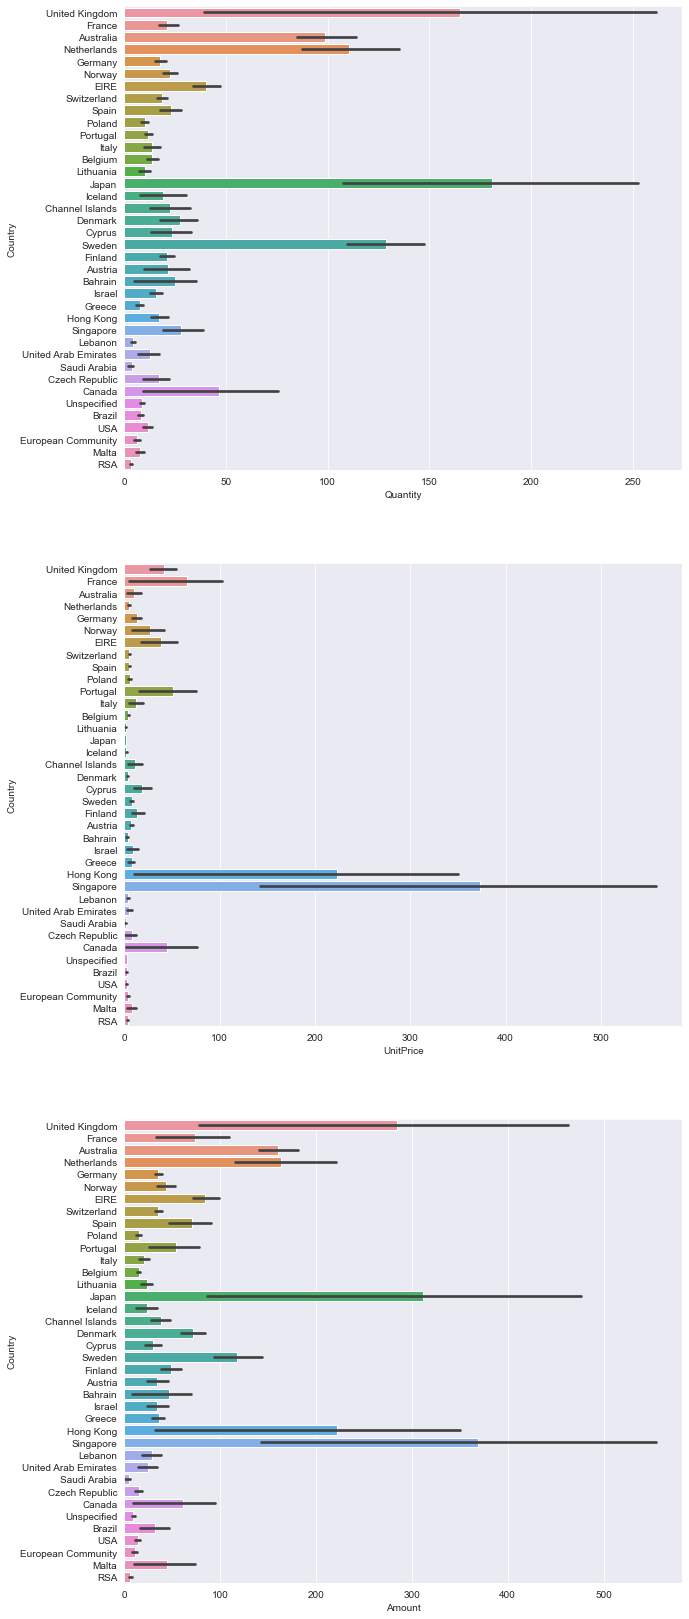

In [68]:
fig,axes=plt.subplots(nrows=3,figsize=(10,29))
sns.barplot(y="Country",x="Quantity",data=data,estimator=np.std,ax=axes[0])
sns.barplot(y="Country",x="UnitPrice",data=data,estimator=np.std,ax=axes[1])
sns.barplot(y="Country",x="Amount",data=data,estimator=np.std,ax=axes[2])
plt.show()

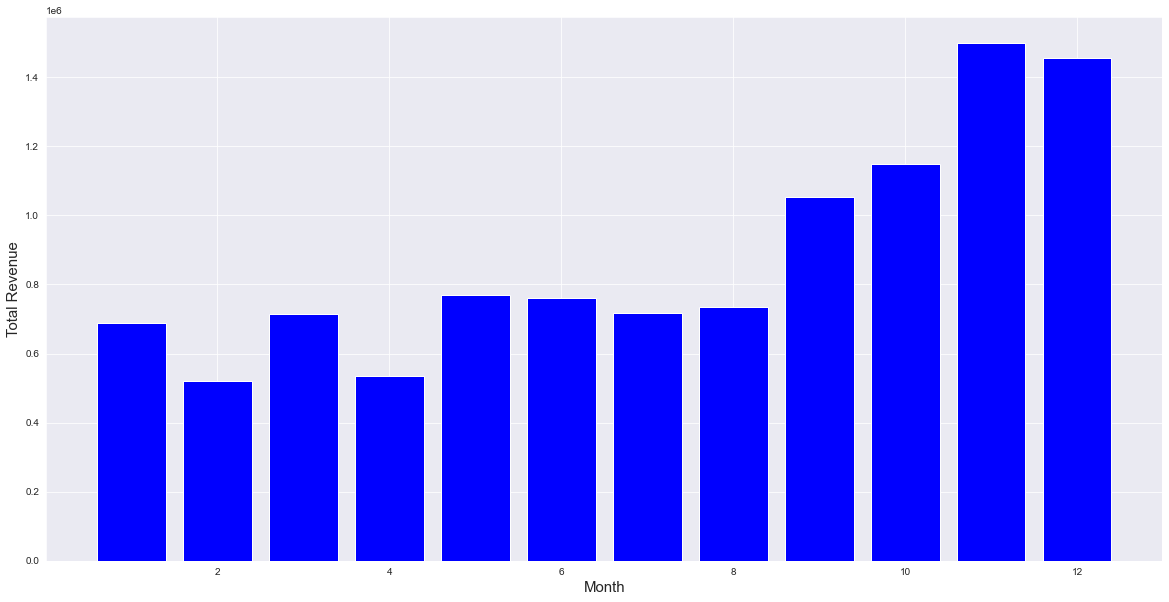

In [69]:
data1=data.groupby("month").sum()
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data1.index,data1["Amount"],color="blue")
plt.xlabel("Month",size=15)
plt.ylabel("Total Revenue",size=15)
plt.show()

j. Pair plot - All Numeric Variables



In [ ]:
sns.pairplot(num_col)
plt.show()

k. Line chart to show the trend of data - All Numeric/Date Variables



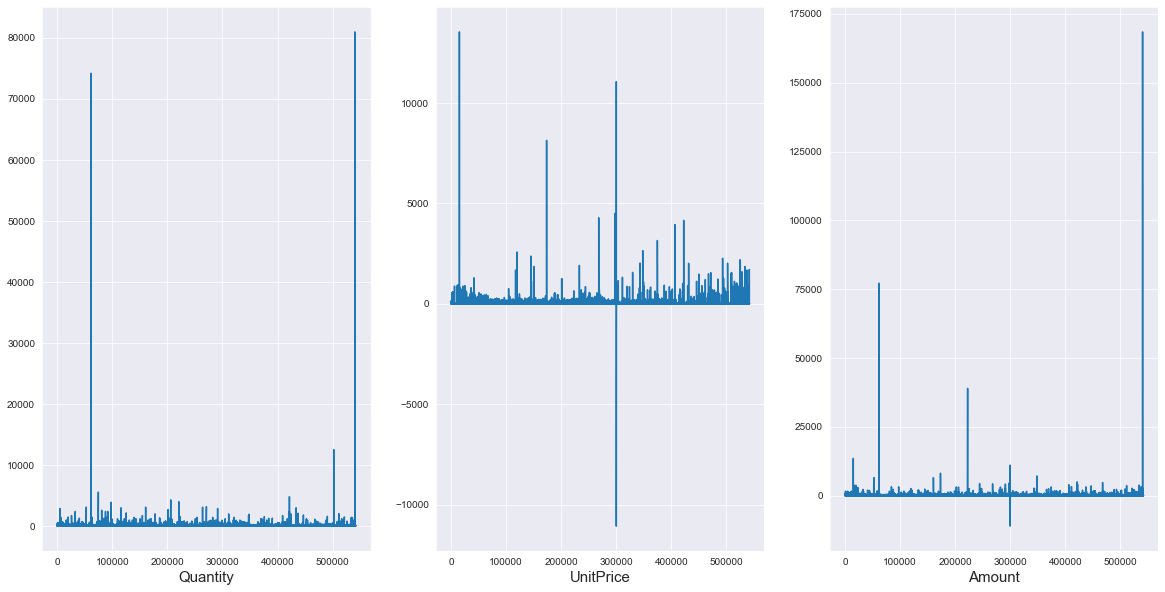

In [71]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].plot(num_col["Quantity"])
ax[0].set_xlabel("Quantity",size=15)
ax[1].plot(num_col["UnitPrice"])
ax[1].set_xlabel("UnitPrice",size=15)
ax[2].plot(num_col["Amount"])
ax[2].set_xlabel("Amount",size=15)
plt.show()

l. Plot the skewness - All Numeric Variables





In [72]:
data.skew()

Quantity      456.021643
UnitPrice      59.980900
CustomerID     -0.409594
month_year     -0.410775
month          -0.410767
day             0.141930
hour           -0.004952
week_day        0.470339
Amount        497.489805
dtype: float64

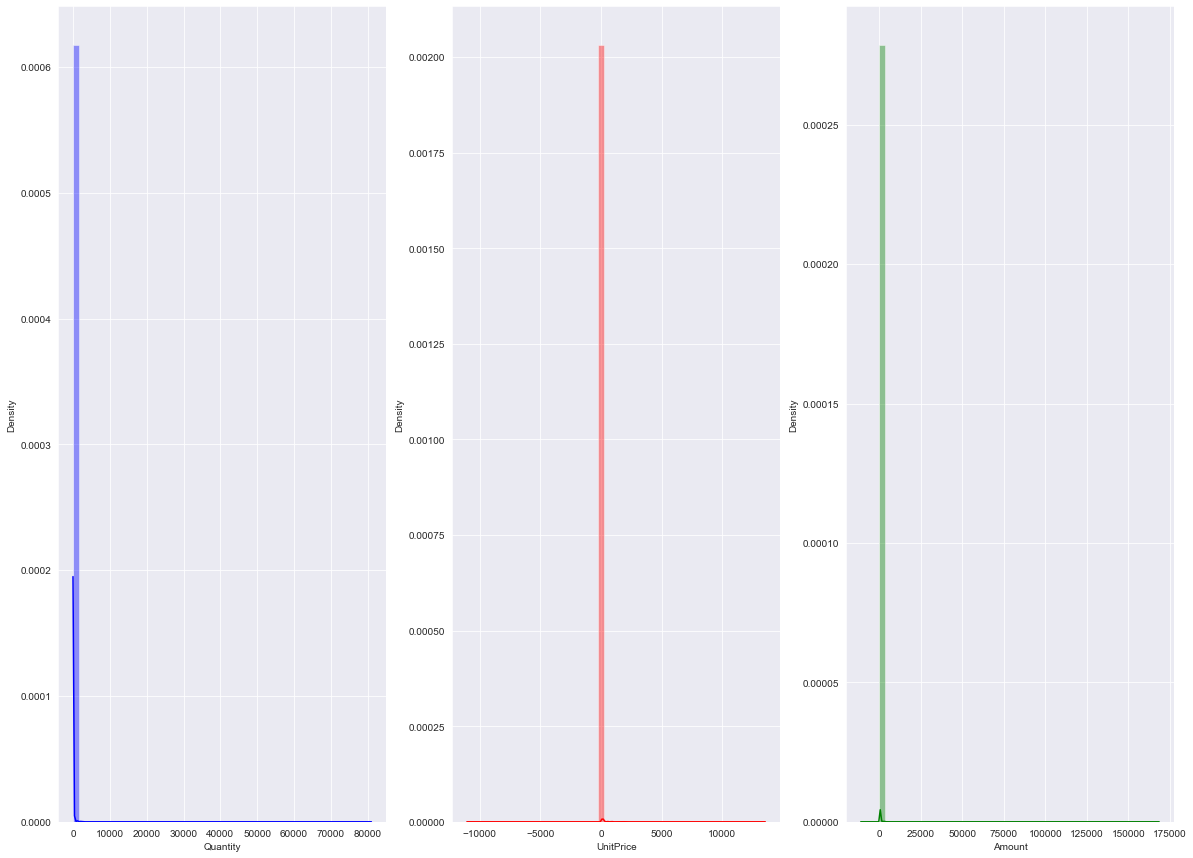

In [73]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
sns.distplot(data["Quantity"],color="blue",ax=ax[0])
sns.distplot(data["UnitPrice"],color="red",ax=ax[1])
sns.distplot(data["Amount"],color="green",ax=ax[2])
plt.show()